(sec:perturbation_theory)=
# Rayleigh–Schrödinger perturbation theory

Since the Hartree–Fock state in many cases approximates the exact electronic ground state wave function quite well, it is natural to use [perturbation theory](https://en.wikipedia.org/wiki/Perturbation_theory_(quantum_mechanics)) as a means to improve the description. The starting point it to divide the Hamiltonian into two parts

$$
\hat{H} = \hat{H}_0 + \hat{V}
$$

where $\hat{H}_0$ is some zeroth-order Hamiltonian and $\hat{V}$ is the perturbation. The orthonormal eigenstates of $\hat{H}_0$ are assumed to be known

$$
\hat{H}_0 | \Phi_n \rangle = \mathcal{E}_n | \Phi_n \rangle
$$

The exact ground state is a solution to the time-independent Schrödinger equation

$$
\hat{H} | \Psi \rangle = E | \Psi \rangle
$$

where $| \Psi \rangle$ and $E$ are expanded in orders of $\hat{V}$

\begin{align*}
| \Psi \rangle & = \sum_{k=0}^\infty | \Psi^{(k)} \rangle \\
E & = \sum_{k=0}^\infty E^{(k)}
\end{align*}

Such an order-by-order procedure may converge given that $\hat{H}_0$ includes the main features of $\hat{H}$, and that $\hat{V}$ in some sense is significantly smaller than $\hat{H}_0$. We get

$$
\big( \hat{H}_0 + \hat{V} \big) \sum_{k=0}^\infty | \Psi^{(k)} \rangle =
\sum_{k,l} E^{(k)} | \Psi^{(l)} \rangle
$$

Collecting terms to order $m$ gives us the master equation of Rayleigh–Schrödinger pertubation theory (RSPT)

$$
\big( \hat{H}_0 - E^{(0)} \big) | \Psi^{(m)} \rangle =
- \hat{V} | \Psi^{(m-1)} \rangle + \sum_{k=1}^m E^{(k)} | \Psi^{(m-k)} \rangle
$$

## Solving the RSPT master equation

To zeroth order, we get

$$
\big( \hat{H}_0 - E^{(0)} \big) | \Psi^{(0)} \rangle = 0
$$

resulting in 

$$
| \Psi^{(0)} \rangle = | \Phi_0 \rangle; \qquad
E^{(0)} = \mathcal{E}_0
$$

We note that the component of $| \Phi_0 \rangle$ in higher-order corrections $| \Psi^{(m)} \rangle$ becomes undetermined since

$$
\big( \hat{H}_0 - E^{(0)} \big) 
\Big[ | \Psi^{(m)} \rangle + c_0^{(m)} | \Phi_0 \rangle \Big] = 
\big( \hat{H}_0 - E^{(0)} \big) | \Psi^{(m)} \rangle
$$

We will *choose* $c_0^{(m)} = 0$ such that $\langle \Psi^{(0)} | \Psi^{(m)} \rangle = 0$ for $m>0$. This corresponds to a choice of intermediate normalization

\begin{align*}
\langle \Psi^{(0)} | \Psi \rangle & = 
\sum_{k=0}^\infty \langle \Psi^{(0)} | \Psi^{(k)} \rangle =
\langle \Psi^{(0)} | \Psi^{(0)} \rangle = 1
\end{align*}

With this choice made, the energy corrections are easily obtained from the RSPT master equation by a projection with $\langle \Psi^{(0)} |$:

$$
E^{(m)} = 
\langle \Psi^{(0)} | \hat{V} | \Psi^{(m-1)} \rangle; \quad m>0
$$

Wave function corrections are obtained from the RSPT master equation by multiplying with the inverse and projecting out the zeroth-order solution in accordance with choice of intermediate normalization

$$
 | \Psi^{(m)} \rangle =
- \hat{P} \big( \hat{H}_0 - E^{(0)} \big)^{-1} \hat{P}
\Big[
\hat{V} | \Psi^{(m-1)} \rangle - \sum_{k=1}^{m-1} E^{(k)} | \Psi^{(m-k)} \rangle
\Big]
$$

where

$$
\hat{P} = \hat{I} - | \Psi^{(0)} \rangle\langle \Psi^{(0)} |
$$

## Numerical illustration

Let us set up a ten-states model of a system. This setup includes defining a diagonal zeroth-order Hamiltonian matrix, $H_0$, and a comparatively smaller perturbation matrix, $V$, without coupling between the ground and first excited state. The state energy  separation in the unperturbed system is customizable.

In [1]:
import numpy as np

np.set_printoptions(precision=4, suppress=True, linewidth=132)


def setup_system(energy_separation=0.5, verbose=False, n=10):

    E_0 = 1.5
    Phi_0 = np.zeros(n)
    Phi_0[0] = 1

    H_0_diag = np.arange(E_0, E_0 + energy_separation * n, energy_separation)
    H_0 = np.diag(H_0_diag)

    np.random.seed(20220526)
    V = -0.1 * np.diag(np.random.rand(n) * 0.1)
    for i in range(2, n):
        V[i - 2 : i, i] = np.random.rand(2) * 0.25
    V = V + V.T

    H = H_0 + V

    eigval, _ = np.linalg.eigh(H)
    E_exact = eigval.min()

    # M = P * (H_0 - E_0)^{-1} * P
    M_diag = H_0_diag - E_0
    M_diag[0] = 1
    M = np.diag(1 / M_diag)
    M[0, 0] = 0

    E = [E_0]
    Psi = [Phi_0]

    if verbose:
        print(H)

    return E_exact, E, Psi, V, M

For a given system, the RSPT equations are solved to determine the energy up to a given order. In a first example, we consider a system where the separation energy is 0.50 and equals twice the maximum perturbation energy of 0.25.

In [2]:
E_exact, E, Psi, V, M = setup_system(energy_separation=0.5, verbose=True, n=10)

[[1.4931 0.     0.1577 0.     0.     0.     0.     0.     0.     0.    ]
 [0.     1.9948 0.2499 0.0431 0.     0.     0.     0.     0.     0.    ]
 [0.1577 0.2499 2.4836 0.1796 0.2426 0.     0.     0.     0.     0.    ]
 [0.     0.0431 0.1796 2.9848 0.1341 0.2125 0.     0.     0.     0.    ]
 [0.     0.     0.2426 0.1341 3.4843 0.2393 0.0742 0.     0.     0.    ]
 [0.     0.     0.     0.2125 0.2393 3.9982 0.1831 0.0795 0.     0.    ]
 [0.     0.     0.     0.     0.0742 0.1831 4.492  0.2116 0.2425 0.    ]
 [0.     0.     0.     0.     0.     0.0795 0.2116 4.9965 0.1532 0.0945]
 [0.     0.     0.     0.     0.     0.     0.2425 0.1532 5.4865 0.2328]
 [0.     0.     0.     0.     0.     0.     0.     0.0945 0.2328 5.9925]]


In [3]:
def rspt_solver(E_exact, E, Psi, V, M, verbose=False):

    error = [E[0] - E_exact]

    if verbose:
        print(" n   RSPT energy    Error")
        print(f" 0 {E[0]:12.8f} {error[0]:14.8f}")

    for m in range(1, 10):

        E.append(np.einsum("i,ij,j", Psi[0], V, Psi[m - 1]))
        error.append(np.array(E).sum() - E_exact)

        R = np.einsum("ij,j->i", V, Psi[m - 1])
        for k in range(1, m):
            R -= E[k] * Psi[m - k]

        Psi.append(np.einsum("ij,j->i", -M, R))

        if verbose:
            print(f"{m:2} {np.array(E).sum():12.8f} {error[-1]:14.8f}")

    return E, error

In [4]:
_ = rspt_solver(E_exact, E, Psi, V, M, True)

 n   RSPT energy    Error
 0   1.50000000     0.03590812
 1   1.49306122     0.02896934
 2   1.46820039     0.00410850
 3   1.46796433     0.00387245
 4   1.46420937     0.00011749
 5   1.46437373     0.00028185
 6   1.46401910    -0.00007279
 7   1.46407353    -0.00001836
 8   1.46407816    -0.00001372
 9   1.46408390    -0.00000798


Convergence of the ground state energy is reasonably smooth with significant increases in accuracy occurring at even orders in perturbation theory.

In a next illustration, we will study how the convergence depends on the state energy separation.

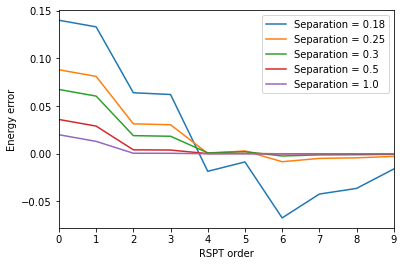

In [6]:
import matplotlib.pyplot as plt

for energy_separation in [0.18, 0.25, 0.3, 0.5, 1.0]:

    E_exact, E, Psi, V, M = setup_system(energy_separation, False, 10)
    E, error = rspt_solver(E_exact, E, Psi, V, M, False)

    plt.plot(range(10), error, label=f"Separation = {energy_separation:.2}")
    
plt.legend()
plt.setp(plt.gca(), xlim=(0, 9), xticks=range(10))

plt.ylabel("Energy error")
plt.xlabel("RSPT order")

plt.show()

As clearly seen, the convergence rate and even success depends critically on the state energy separation. This is due to the fact the a smaller energy separation leads to larger inverse matrix in the RSPT equation from which we determine the state vector correction $ |\Psi^{(m)} \rangle$.

## Size extensivity in RSPT

A system composed of two noninteracting subsystems has a Hamiltonian that is separable

$$
\hat{H} = \hat{H}_A \otimes \hat{I}_B + \hat{I}_A \otimes \hat{H}_B \equiv \hat{H}_A + \hat{H}_B
$$

where, in the last step, identity operators are left out and implicitly understood.

### Zeroth- and first-order energies

We assume that the unperturbed Hamiltonian (and thereby also the perturbation) is chosen as to also be separable. The zeroth-order wave function becomes

$$
|\Psi_{AB}^{(0)} \rangle = |\Psi_{A}^{(0)} \rangle \otimes |\Psi_{B}^{(0)} \rangle
$$

and the associated zeroth-order energy reads

$$
E_{AB}^{(0)} = E_{A}^{(0)} + E_{B}^{(0)}
$$

For the first-order energy correction, we straightforwardly get

$$
E_{AB}^{(1)} =
\langle \Psi_{AB}^{(0)} | \hat{V} | \Psi_{AB}^{(0)} \rangle
= E_{A}^{(1)} + E_{B}^{(1)}
$$

### Second-order energy

The first-order wave function becomes

$$
|\Psi_{AB}^{(1)} \rangle = 
- \big( \hat{H}_0 - E^{(0)}_{AB} \big)^{-1}
\big(\hat{V} - E_{AB}^{(1)} \big)| \Psi_{AB}^{(0)} \rangle 
$$

Operators and energies within parenthesis are separable but we need to investigate the effect of the inverse operation.

Let us introduce $\hat{\Omega}_A = \hat{H}_{0;A} - E^{(0)}_{A}$ and use the identity

$$
- \big(\hat{\Omega}_A + \hat{\Omega}_B\big)^{-1} =
- \hat{\Omega}_A ^{-1} +
\big(\hat{\Omega}_A + \hat{\Omega}_B\big)^{-1} \hat{\Omega}_B \hat{\Omega}_A ^{-1}
$$

For the first of these two terms, we get

$$
- \hat{\Omega}_A ^{-1} \big(\hat{V}_A - E_{A}^{(1)} \big)| \Psi_{A}^{(0)} \rangle  = | \Psi_{A}^{(1)} \rangle 
$$

whereas for the second, we get

$$
\hat{\Omega}_B \hat{\Omega}_A ^{-1} \big(\hat{V}_A - E_{A}^{(1)} \big)
| \Psi_{A}^{(0)} \rangle \otimes | \Psi_{B}^{(0)} \rangle = 0
$$

since

$$
\hat{\Omega}_B | \Psi_{B}^{(0)} \rangle = 0
$$

Collecting results for the two subsystems, the first-order correction to the wave function becomes

$$
|\Psi_{AB}^{(1)} \rangle = |\Psi_{A}^{(1)} \rangle \otimes |\Psi_{B}^{(0)} \rangle +
|\Psi_{A}^{(0)} \rangle \otimes |\Psi_{B}^{(1)} \rangle
$$

and the second-order correction to the energy is thereby shown to fulfill

$$
E_{AB}^{(2)} =
\langle \Psi_{AB}^{(0)} | \hat{V} | \Psi_{AB}^{(1)} \rangle
= E_{A}^{(2)} + E_{B}^{(2)}
$$

In other words, RSPT has been shown to be size-extensive up to second order in perturbation theory.